In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Creating path
path = r'C:\Users\nickr\OneDrive\Documents\Nick Bootcamp\Machine Learning\Data Sets'

In [5]:
pleasant = pd.read_csv(os.path.join(path, 'Weather_Prediction_Pleasant_Weather.csv'))

In [7]:
climate = pd.read_csv(os.path.join(path, 'unscaled_cleaned_weather_dated.csv'), index_col = False)

In [9]:
climate.head()

,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,10.6,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,6.0,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [11]:
climate.shape

(22950, 136)

In [13]:
pleasant.shape

(22950, 16)

In [63]:
# Reducing data set to Oslo station only
# Create a list of the columns containing "Oslo" in their names

oslo_list = list(x for x in climate.columns if x.find('OSLO') >=0)
oslo_list

['OSLO_cloud_cover',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max']

In [17]:
# Create a dataframe with those columns

df_oslo = climate[oslo_list]
df_oslo

,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max
0,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9
1,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9
2,8,0.69,1.0234,0.04,0.08,0.0,1.9,0.6,3.1
3,8,0.98,1.0244,0.04,0.35,0.0,3.0,0.4,4.9
4,8,0.96,1.0092,0.05,0.26,0.0,3.7,2.9,4.9
...,...,...,...,...,...,...,...,...,...
22945,8,0.98,1.0139,1.06,0.21,0.1,9.7,5.8,12.0
22946,8,1.00,1.0107,1.06,0.21,0.0,10.9,8.8,11.7
22947,3,0.85,1.0082,1.06,0.21,6.8,9.7,7.7,14.2
22948,5,0.94,1.0150,1.06,0.21,2.9,5.9,2.1,8.1


In [19]:
# Reducing pleasant dataset to Oslo station only

pleasant_oslo = pleasant['OSLO_pleasant_weather']
pleasant_oslo

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: OSLO_pleasant_weather, Length: 22950, dtype: int64

In [21]:
# Checking dataset shapes
df_oslo.shape

(22950, 9)

In [23]:
pleasant_oslo.shape

(22950,)

In [25]:
# Reshaping for modeling

X = df_oslo

In [27]:
y = pleasant_oslo

In [29]:
# Turn X and y from df to arrays

X = np.array(X)
y = np.array(y)

In [31]:
X.shape

(22950, 9)

In [33]:
y.shape

(22950,)

In [35]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [37]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [39]:
X_train

array([[  2.    ,   0.48  ,   1.0207, ...,  10.5   ,   6.2   ,  16.5   ],
       [  4.    ,   0.88  ,   1.0101, ..., -11.2   , -13.8   ,  -8.2   ],
       [  4.    ,   0.77  ,   1.0202, ..., -14.4   , -19.    , -11.7   ],
       ...,
       [  8.    ,   0.72  ,   1.0083, ...,   6.4   ,   5.2   ,   9.5   ],
       [  8.    ,   0.78  ,   1.0115, ...,   8.6   ,   6.5   ,  11.4   ],
       [  3.    ,   0.48  ,   1.0173, ...,   4.4   ,  -1.6   ,   9.6   ]])

In [41]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
X_test

array([[ 6.    ,  0.85  ,  0.9968, ..., 13.1   ,  9.4   , 20.    ],
       [ 5.    ,  0.71  ,  1.0352, ..., -4.5   , -6.    , -1.6   ],
       [ 8.    ,  0.87  ,  0.9991, ..., 14.7   , 13.9   , 16.2   ],
       ...,
       [ 8.    ,  0.89  ,  1.0196, ...,  8.    ,  6.9   ,  9.    ],
       [ 3.    ,  0.75  ,  1.0173, ..., -0.9   , -6.    ,  4.6   ],
       [ 4.    ,  0.54  ,  1.0126, ..., 11.4   ,  5.6   , 15.1   ]])

In [45]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
# Creating Random Forest Model for Oslo
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9998257232485186


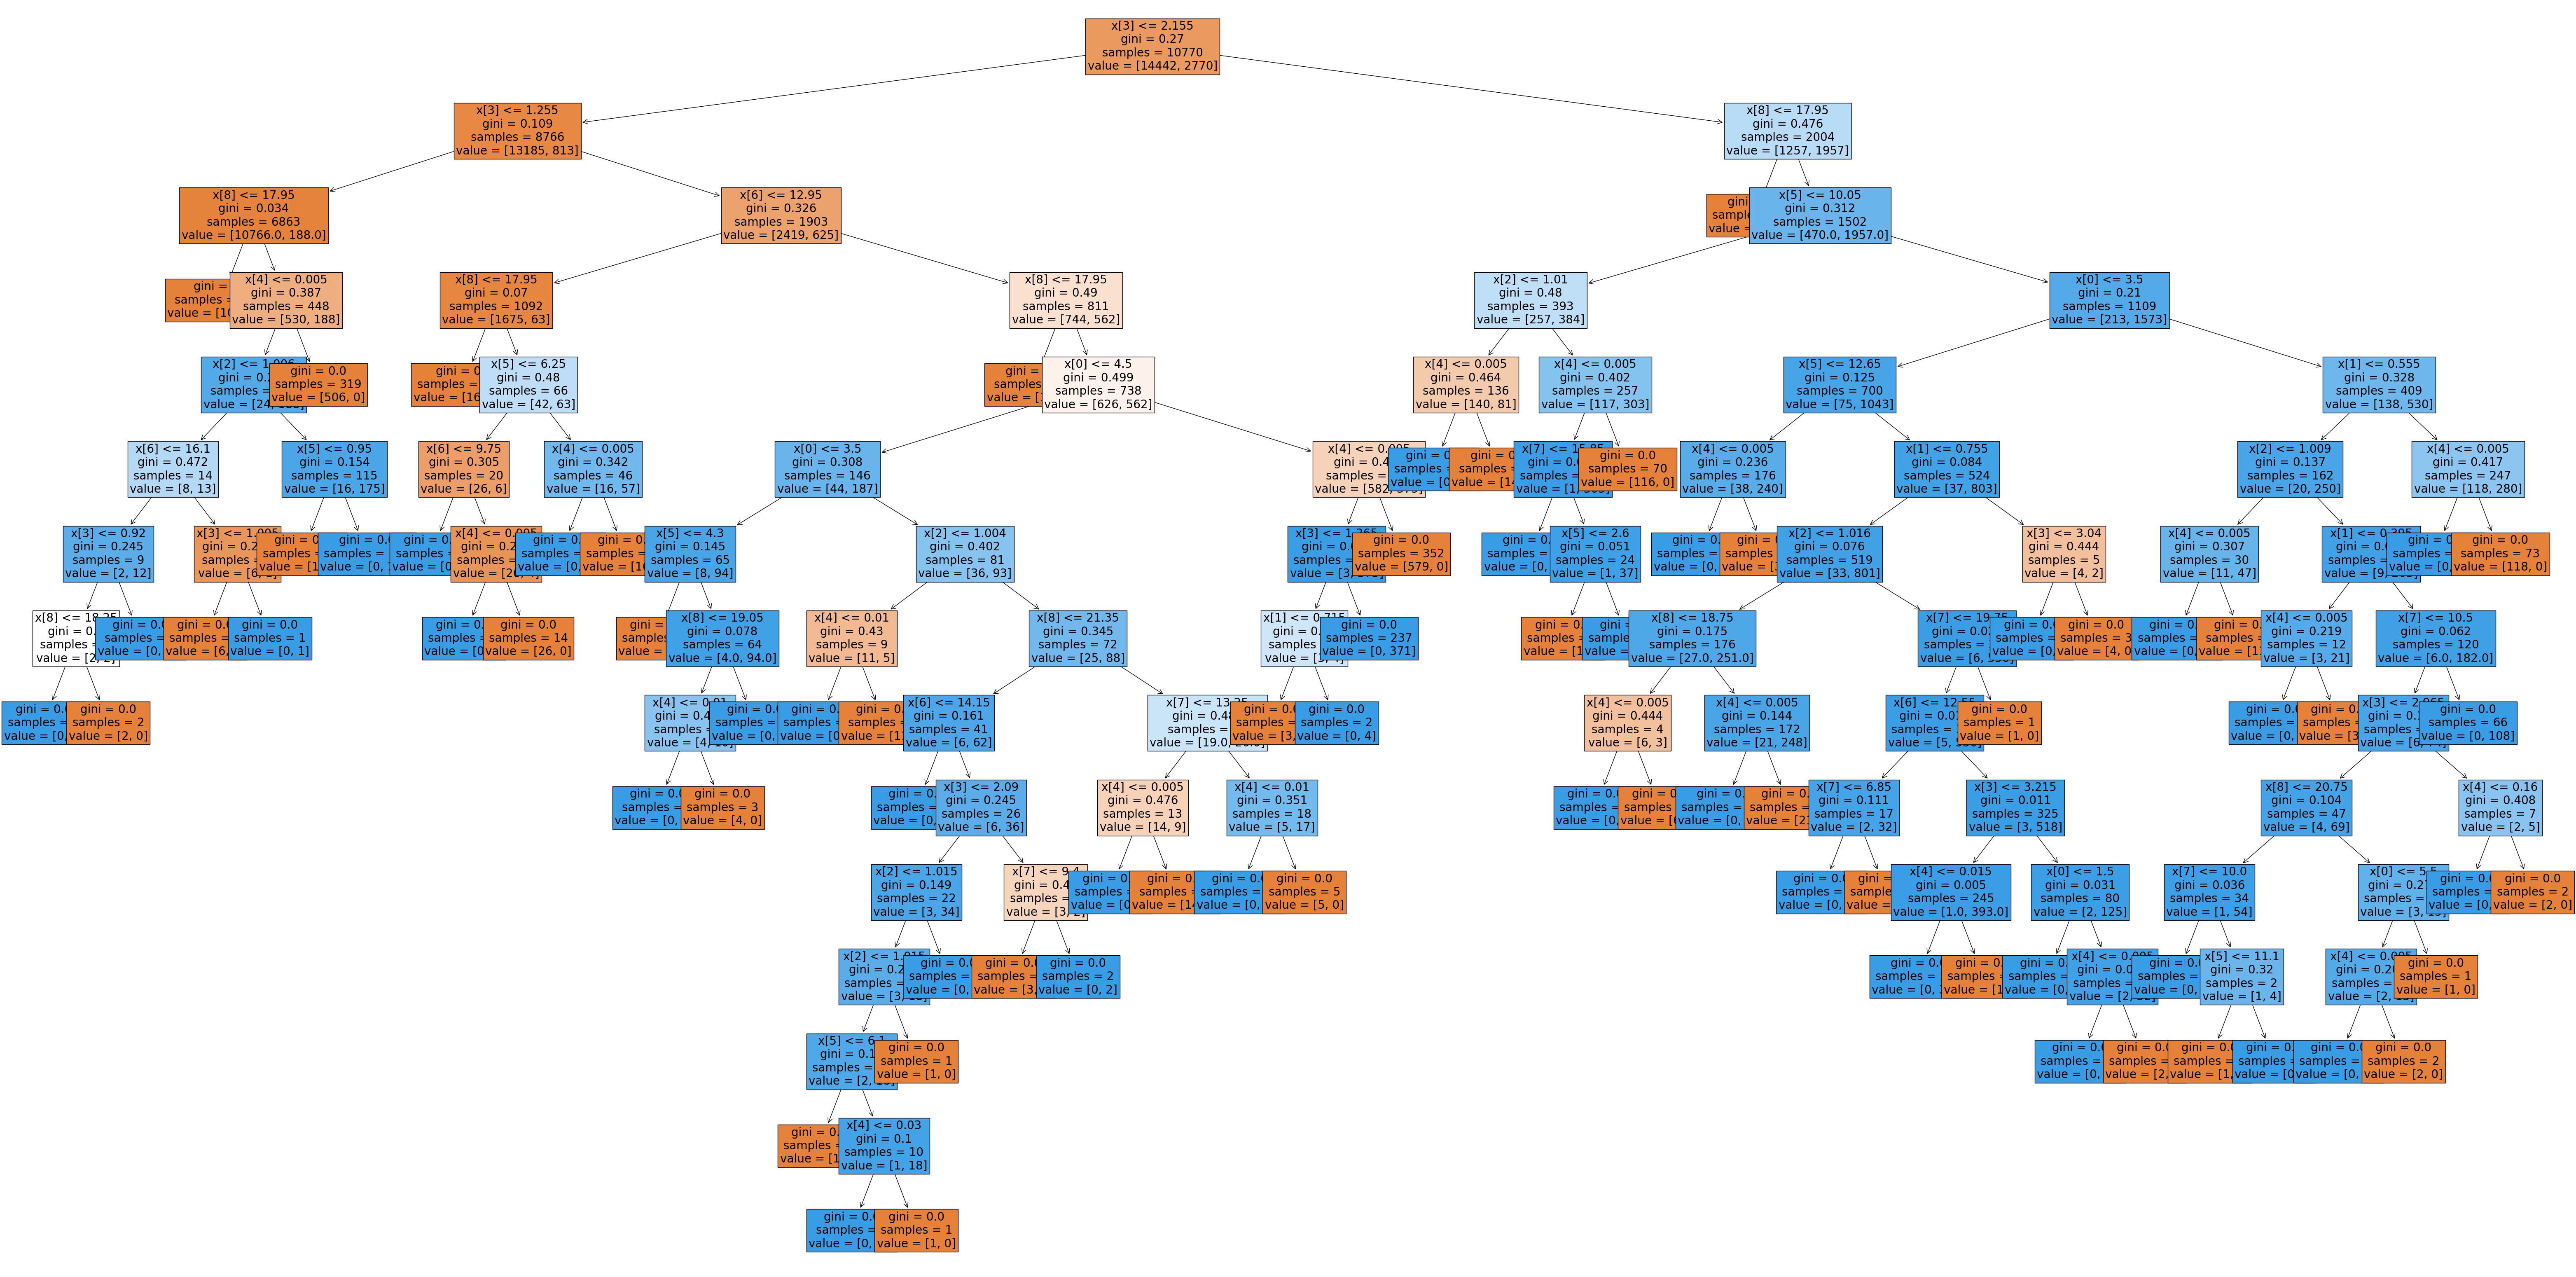

In [51]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [53]:
fig.savefig(os.path.join(path, 'Visualizations', 'random_forest_Oslo.png'),bbox_inches='tight')

In [55]:
# Discovering Feature Importances
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.02363842, 0.01543127, 0.0110459 , 0.09624336, 0.30827442,
       0.06682484, 0.13826435, 0.04986849, 0.29040895])

In [57]:
# Create a list of weather features

wx_list = [feature.replace('OSLO_', '') for feature in oslo_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [59]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.023638
humidity            0.015431
pressure            0.011046
global_radiation    0.096243
precipitation       0.308274
sunshine            0.066825
temp_mean           0.138264
temp_min            0.049868
temp_max            0.290409
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


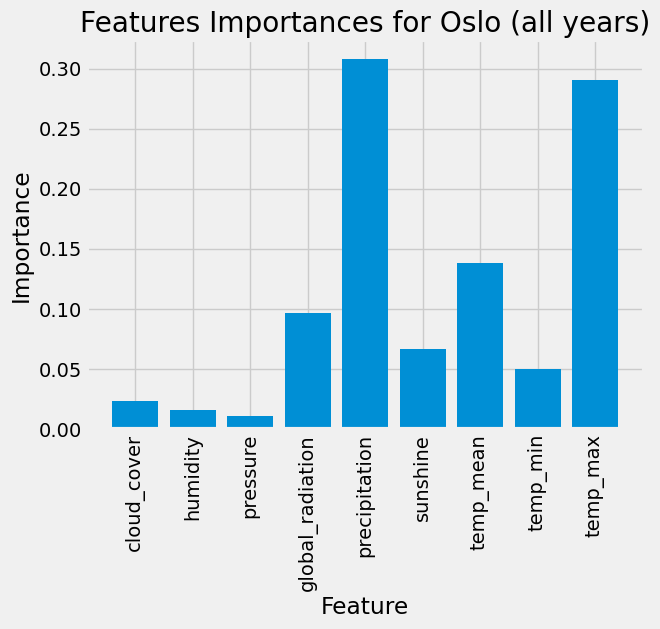

In [61]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Oslo (all years)');

plt.savefig(os.path.join(path, 'Visualizations', 'Oslo_feature_importances.png'), bbox_inches='tight')
plt.show()